In [ ]:
# Download required libraries
!pip install spotipy
!pip install pyspark
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 8.1 MB/s 
     |████████████████████████████████| 140 kB 44.3 MB/s 
     |████████████████████████████████| 62 kB 696 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 42 kB/s 
     |████████████████████████████████| 199 kB 53.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=8a875b3852c0885a422f0ee5b13bad6238f7a848865d4de71f6655001e4a0907
  Stored in directory: /root/.cac

In [ ]:
# Import the required libraries
import os
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import spotipy
import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials

import pyspark
from pyspark.sql import *
from pyspark import SparkContext, SparkConf, SQLContext
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import swifter
import warnings
warnings.filterwarnings("ignore")
from pyspark.ml.clustering import KMeans
import seaborn as sns

In [ ]:
# Declare the credentials that we created on the spotify developer app
cid = 'b55c626d2f9944afa907d7fa9d69a3ea'
secret = '83fa50a28b664fc1adebfb6b9d33b58c'
redirect_uri='http://localhost:8888/callback'
#username = '1240951381'
username = '31rcjno7cxn6xfj6jbjgya4cmaqi'

In [ ]:
# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=10,  retries=10)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

auth_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(auth_manager=auth_manager)
token = 'BQAl9l1GH-1Pd8PUM9rEUofaWU5X-tGbJniZzlIhQto68vF7UVlZfY4DD-8opw866XmmsFBT2zJVj5owttkTfYdz_28BTQEmbYm3mNv6Io6g08YJVGAsCl3Vfcr9jlMgWsgWTlLyCZlBq6r821XwI2026P6ncFfdr2UlksoFxE6ZyrGMpnAPunam-YbiU2hAkQ4'
sp = spotipy.Spotify(auth=token)

In [ ]:
# Function returns all the playlists( id and name) for the user passed
def fetch_playlists(sp, username):  
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [ ]:
playlists = fetch_playlists(sp, username)
playlists

,id,name,#tracks
0,1gOpHrNEglXe3oqZcxqUyL,Liked Songs Nov 2022,1097
1,7cdQ6kaEIUF3BbofuIqVWG,Atif Aslam,23
2,6cLWjI8j4iTdqlsBwo8yLU,Post Malone,5
3,2wPZmqsyccfR0E52DYSGMn,C 2021,104
4,6WIP4Y5ViPgLAkhWS0FXwX,Jasleen Royal,11
5,7zSKdLM2vk4NHHzRakpqGL,Indie Pop 2021,118
6,5PpuTXHTVjDxu9ioUdRZrq,The Weeknd,5
7,1sOE1spI3t4D92X8XdJztX,2021,14
8,7MZcBlXolB2WMhs6zD2sV7,Daily 180 minutes,70
9,5xepLiME1f2Y5an60k8S9P,The Chainsmokers,8


In [ ]:
#Function that returns the tracks for a given playlist for a user.
def fetch_playlist_tracks(sp, username, playlist_id):
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [ ]:
# Function for extracting features of a single track
def fetch_audio_features(sp, username):
    index = 0
    result_df = pd.DataFrame(columns = ['track_id','track_name','danceability','energy','tempo','loudness','valence','speechiness','instrumentalness','liveness','acousticness','type','uri','track_href',
                                        'analysis_url','duration_ms','time_signature'])
    playlists =  fetch_playlists(sp, username)
    for i in range(0, playlists.shape[0]):
        
        tracks = fetch_playlist_tracks(sp, username, playlists.iloc[i, 0])
        index = 0
        audio_features = []
        
        while index < tracks.shape[0]:
            audio_features += sp.audio_features(tracks.iloc[index:index + 50, 0])
            index += 50
        
        features_list = []
        for features in audio_features:
            features_list.append([features['danceability'],
                                  features['energy'], features['tempo'],
                                  features['loudness'], features['valence'],
                                  features['speechiness'], features['instrumentalness'],
                                  features['liveness'], features['acousticness'],features['type'],features['uri'],
                                  features['track_href'], features['analysis_url'],features['duration_ms'],features['time_signature']])
        
        df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                                'tempo', 'loudness', 'valence',
                                                                'speechiness', 'instrumentalness',
                                                                'liveness', 'acousticness','type','uri','track_href',
                                                                'analysis_url','duration_ms','time_signature'])
        
        df_playlist_audio_features = pd.concat([tracks, df_audio_features], axis=1)
        #df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)

        result_df = result_df.append(df_playlist_audio_features, ignore_index=True)
        
    return result_df

In [ ]:
playlist_det = fetch_audio_features(sp, username)
playlist_det.head()

,track_id,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,type,uri,track_href,analysis_url,duration_ms,time_signature
0,16frIpnyUb9poRwQxQTmaC,Come With Me,0.876,0.565,111.936,-6.569,0.931,0.0333,0.028400,0.1140,0.160,audio_features,spotify:track:16frIpnyUb9poRwQxQTmaC,https://api.spotify.com/v1/tracks/16frIpnyUb9p...,https://api.spotify.com/v1/audio-analysis/16fr...,209732,4
1,6vo7Y1iWyZvpjvFbf6BiZ5,Kalank (Title Track),0.570,0.550,117.999,-8.343,0.435,0.0350,0.000037,0.0921,0.524,audio_features,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,https://api.spotify.com/v1/tracks/6vo7Y1iWyZvp...,https://api.spotify.com/v1/audio-analysis/6vo7...,311186,4
2,1ue7zm5TVVvmoQV8lK6K2H,Pretty Girl,0.456,0.764,124.971,-3.584,0.383,0.1480,0.000000,0.2290,0.298,audio_features,spotify:track:1ue7zm5TVVvmoQV8lK6K2H,https://api.spotify.com/v1/tracks/1ue7zm5TVVvm...,https://api.spotify.com/v1/audio-analysis/1ue7...,219429,5
3,2P4OICZRVAQcYAV2JReRfj,Waiting For Love,0.579,0.736,127.999,-3.863,0.613,0.0527,0.000000,0.1980,0.310,audio_features,spotify:track:2P4OICZRVAQcYAV2JReRfj,https://api.spotify.com/v1/tracks/2P4OICZRVAQc...,https://api.spotify.com/v1/audio-analysis/2P4O...,230613,4
4,62UAFVREdTssSevwa5jqhF,I Took A Pill In Ibiza - Seeb Remix,0.665,0.727,101.976,-6.570,0.660,0.1030,0.000010,0.0873,0.032,audio_features,spotify:track:62UAFVREdTssSevwa5jqhF,https://api.spotify.com/v1/tracks/62UAFVREdTss...,https://api.spotify.com/v1/audio-analysis/62UA...,197933,4


In [ ]:
playlist_det = pd.read_csv('playlist_det_genre.csv')

In [ ]:
playlist_det.head(2)

,Unnamed: 0,Unnamed: 0.1,track_id,track_name,danceability,energy,tempo,loudness,valence,speechiness,...,uri,track_href,analysis_url,duration_ms,time_signature,artist_name,artist_id,artist_pop,track_pop,genres
0,0,0,16frIpnyUb9poRwQxQTmaC,Come With Me,0.876,0.565,111.936,-6.569,0.931,0.0333,...,spotify:track:16frIpnyUb9poRwQxQTmaC,https://api.spotify.com/v1/tracks/16frIpnyUb9p...,https://api.spotify.com/v1/audio-analysis/16fr...,209732,4,Surfaces,4ETSs924pXMzjIeD6E9b4u,68,70,bedroom_soul pop
1,1,1,6vo7Y1iWyZvpjvFbf6BiZ5,Kalank (Title Track),0.570,0.550,117.999,-8.343,0.435,0.0350,...,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,https://api.spotify.com/v1/tracks/6vo7Y1iWyZvp...,https://api.spotify.com/v1/audio-analysis/6vo7...,311186,4,Pritam,1wRPtKGflJrBx9BmLsSwlU,85,73,filmi indian_instrumental modern_bollywood


In [ ]:
playlist_det = playlist_det.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis= 1)

In [ ]:
# total data
playlist_det.shape

(19828, 22)

In [ ]:
#playlist_det.to_csv('playlist_det.csv')

In [ ]:
# Function to get the tracks genre info based on the tracks artist
def get_artist_name(track_id):
    # fetch the artist id for the track 
    artist_name = sp.track(track_id)["artists"][0]["name"]
    return artist_name

In [ ]:
playlist_det['artist_name'] = playlist_det['track_id'].swifter.apply(lambda x: get_artist_name(x))

In [ ]:
def get_artist_id(track_id):
    # fetch the artist id for the track 
    artist = sp.track(track_id)["artists"][0]["id"]
    return artist

In [ ]:
playlist_det['artist_id'] = playlist_det['track_id'].swifter.apply(lambda x: get_artist_id(x))

In [ ]:
def get_artist_pop(artist):
    # get the artist popularity
    artist_pop = sp.artist(artist)["popularity"]
    return artist_pop

In [ ]:
playlist_det['artist_pop'] = playlist_det['artist_id'].swifter.apply(lambda x: get_artist_pop(x))

In [ ]:
def get_track_pop(track_id):
    track_pop = sp.track(track_id)["popularity"]
    return track_pop

In [ ]:
playlist_det['track_pop'] = playlist_det['track_id'].swifter.apply(lambda x: get_track_pop(x))

In [ ]:
# downloaded the above data into a csv file playlist_det.csv
#playlist_det.to_csv('playlist_det_withgenre.csv')
# Uploading again for collecting the genre details
playlist_det = pd.read_csv('playlist_det_genre.csv')

In [ ]:
playlist_det.head()

,Unnamed: 0,Unnamed: 0.1,track_id,track_name,danceability,energy,tempo,loudness,valence,speechiness,...,uri,track_href,analysis_url,duration_ms,time_signature,artist_name,artist_id,artist_pop,track_pop,genres
0,0,0,16frIpnyUb9poRwQxQTmaC,Come With Me,0.876,0.565,111.936,-6.569,0.931,0.0333,...,spotify:track:16frIpnyUb9poRwQxQTmaC,https://api.spotify.com/v1/tracks/16frIpnyUb9p...,https://api.spotify.com/v1/audio-analysis/16fr...,209732,4,Surfaces,4ETSs924pXMzjIeD6E9b4u,68,70,bedroom_soul pop
1,1,1,6vo7Y1iWyZvpjvFbf6BiZ5,Kalank (Title Track),0.570,0.550,117.999,-8.343,0.435,0.0350,...,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,https://api.spotify.com/v1/tracks/6vo7Y1iWyZvp...,https://api.spotify.com/v1/audio-analysis/6vo7...,311186,4,Pritam,1wRPtKGflJrBx9BmLsSwlU,85,73,filmi indian_instrumental modern_bollywood
2,2,2,1ue7zm5TVVvmoQV8lK6K2H,Pretty Girl,0.456,0.764,124.971,-3.584,0.383,0.1480,...,spotify:track:1ue7zm5TVVvmoQV8lK6K2H,https://api.spotify.com/v1/tracks/1ue7zm5TVVvm...,https://api.spotify.com/v1/audio-analysis/1ue7...,219429,5,Maggie Lindemann,0uGk2czvcpWQA383Im6ajf,64,66,alt_z dark_pop pop pop_punk post-teen_pop
3,3,3,2P4OICZRVAQcYAV2JReRfj,Waiting For Love,0.579,0.736,127.999,-3.863,0.613,0.0527,...,spotify:track:2P4OICZRVAQcYAV2JReRfj,https://api.spotify.com/v1/tracks/2P4OICZRVAQc...,https://api.spotify.com/v1/audio-analysis/2P4O...,230613,4,Avicii,1vCWHaC5f2uS3yhpwWbIA6,80,81,dance_pop edm pop pop_dance pop_rap
4,4,4,62UAFVREdTssSevwa5jqhF,I Took A Pill In Ibiza - Seeb Remix,0.665,0.727,101.976,-6.570,0.660,0.1030,...,spotify:track:62UAFVREdTssSevwa5jqhF,https://api.spotify.com/v1/tracks/62UAFVREdTss...,https://api.spotify.com/v1/audio-analysis/62UA...,197933,4,Mike Posner,2KsP6tYLJlTBvSUxnwlVWa,69,58,dance_pop edm pop pop_rap


In [ ]:
def get_genre_name(artist):
    # get the genres by the artist
    artist_genres = sp.artist(artist)["genres"]
    if artist_genres:
        genres = " ".join([re.sub(' ','_',i) for i in artist_genres])
    else:
        genres = "unknown"
    return genres

In [ ]:
playlist_det['genres'] = playlist_det['artist_id'].swifter.apply(lambda x: get_genre_name(x))

Pandas Apply:   0%|          | 0/1235 [00:00<?, ?it/s]

In [ ]:
# Saving the data into a csv file as a backup
#playlist_det.to_csv('playlist_det_genre.csv')

In [ ]:
playlist_det = playlist_det.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [ ]:
playlist_det.head()

,track_id,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,artist_name,artist_id,artist_pop,track_pop,genres
0,16frIpnyUb9poRwQxQTmaC,Come With Me,0.876,0.565,111.936,-6.569,0.931,0.0333,0.028400,0.1140,...,spotify:track:16frIpnyUb9poRwQxQTmaC,https://api.spotify.com/v1/tracks/16frIpnyUb9p...,https://api.spotify.com/v1/audio-analysis/16fr...,209732,4,Surfaces,4ETSs924pXMzjIeD6E9b4u,68,70,bedroom_soul pop
1,6vo7Y1iWyZvpjvFbf6BiZ5,Kalank (Title Track),0.570,0.550,117.999,-8.343,0.435,0.0350,0.000037,0.0921,...,spotify:track:6vo7Y1iWyZvpjvFbf6BiZ5,https://api.spotify.com/v1/tracks/6vo7Y1iWyZvp...,https://api.spotify.com/v1/audio-analysis/6vo7...,311186,4,Pritam,1wRPtKGflJrBx9BmLsSwlU,85,73,filmi indian_instrumental modern_bollywood
2,1ue7zm5TVVvmoQV8lK6K2H,Pretty Girl,0.456,0.764,124.971,-3.584,0.383,0.1480,0.000000,0.2290,...,spotify:track:1ue7zm5TVVvmoQV8lK6K2H,https://api.spotify.com/v1/tracks/1ue7zm5TVVvm...,https://api.spotify.com/v1/audio-analysis/1ue7...,219429,5,Maggie Lindemann,0uGk2czvcpWQA383Im6ajf,64,66,alt_z dark_pop pop pop_punk post-teen_pop
3,2P4OICZRVAQcYAV2JReRfj,Waiting For Love,0.579,0.736,127.999,-3.863,0.613,0.0527,0.000000,0.1980,...,spotify:track:2P4OICZRVAQcYAV2JReRfj,https://api.spotify.com/v1/tracks/2P4OICZRVAQc...,https://api.spotify.com/v1/audio-analysis/2P4O...,230613,4,Avicii,1vCWHaC5f2uS3yhpwWbIA6,80,81,dance_pop edm pop pop_dance pop_rap
4,62UAFVREdTssSevwa5jqhF,I Took A Pill In Ibiza - Seeb Remix,0.665,0.727,101.976,-6.570,0.660,0.1030,0.000010,0.0873,...,spotify:track:62UAFVREdTssSevwa5jqhF,https://api.spotify.com/v1/tracks/62UAFVREdTss...,https://api.spotify.com/v1/audio-analysis/62UA...,197933,4,Mike Posner,2KsP6tYLJlTBvSUxnwlVWa,69,58,dance_pop edm pop pop_rap


In [ ]:
playlist_det.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'loudness',
       'valence', 'speechiness', 'instrumentalness', 'liveness',
       'acousticness', 'type', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'artist_name', 'artist_id',
       'artist_pop', 'track_pop', 'genres'],
      dtype='object')

In [ ]:
playlist_det.shape

(19827, 22)

In [ ]:
# Removing Outlier
playlist_det = playlist_det[playlist_det['track_name'] != 'Tum Mile - Pocket Cinema']

In [ ]:
# Taking the frequnecy distribution of the different genres
genres = playlist_det['genres'].value_counts().rename_axis('genres').reset_index(name='counts')

In [ ]:
genres

,genres,counts
0,desi_pop filmi modern_bollywood,3529
1,filmi indian_instrumental modern_bollywood,1309
2,unknown,1177
3,classic_pakistani_pop desi_pop filmi modern_bo...,896
4,desi_pop modern_bollywood,718
...,...,...
386,dutch_pop indie_soul,1
387,canadian_contemporary_r&b chill_pop chill_r&b ...,1
388,afrofuturism pop post-teen_pop,1
389,minneapolis_indie,1


In [ ]:
genres.shape

(391, 2)

In [ ]:
# taking only the top ten genres
genres = genres[1:11]

In [ ]:
genres.shape

(10, 2)

In [ ]:
genres

,genres,counts
1,filmi indian_instrumental modern_bollywood,1309
2,unknown,1177
3,classic_pakistani_pop desi_pop filmi modern_bo...,896
4,desi_pop modern_bollywood,718
5,filmi modern_bollywood,560
6,desi_hip_hop desi_pop hindi_indie indian_edm,393
7,desi_pop filmi modern_bollywood sufi,336
8,desi_hip_hop desi_pop modern_bollywood,320
9,desi_hip_hop desi_pop filmi modern_bollywood,320
10,dance_pop edm electropop pop pop_dance tropica...,296


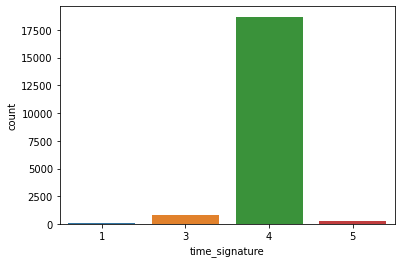

In [ ]:
# Plotting categorical variable
# Frequency of time_signature column
sns.countplot(data= playlist_det, x='time_signature')

Most of the tracks have time signature as 4.

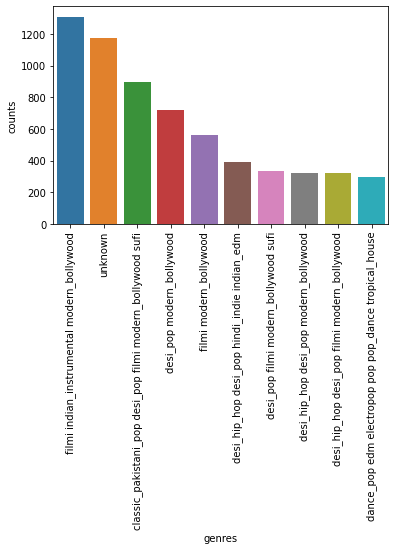

In [ ]:
# Frequency of different genres
sns.barplot(data= genres, x='genres', y = 'counts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Removing unwanted columns
#df_playlist = playlist_det.drop(['type', 'uri', 'track_href', 'analysis_url', 'Unnamed: 0'], 1)
df_playlist = playlist_det.drop(['type', 'uri', 'track_href', 'analysis_url'], 1)

In [ ]:
df_playlist

,track_id,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,duration_ms,time_signature,artist_name,artist_id,artist_pop,track_pop,genres
0,16frIpnyUb9poRwQxQTmaC,Come With Me,0.876,0.565,111.936,-6.569,0.931,0.0333,0.028400,0.1140,0.1600,209732,4,Surfaces,4ETSs924pXMzjIeD6E9b4u,68,70,bedroom_soul pop
1,6vo7Y1iWyZvpjvFbf6BiZ5,Kalank (Title Track),0.570,0.550,117.999,-8.343,0.435,0.0350,0.000037,0.0921,0.5240,311186,4,Pritam,1wRPtKGflJrBx9BmLsSwlU,85,73,filmi indian_instrumental modern_bollywood
2,1ue7zm5TVVvmoQV8lK6K2H,Pretty Girl,0.456,0.764,124.971,-3.584,0.383,0.1480,0.000000,0.2290,0.2980,219429,5,Maggie Lindemann,0uGk2czvcpWQA383Im6ajf,64,66,alt_z dark_pop pop pop_punk post-teen_pop
3,2P4OICZRVAQcYAV2JReRfj,Waiting For Love,0.579,0.736,127.999,-3.863,0.613,0.0527,0.000000,0.1980,0.3100,230613,4,Avicii,1vCWHaC5f2uS3yhpwWbIA6,80,81,dance_pop edm pop pop_dance pop_rap
4,62UAFVREdTssSevwa5jqhF,I Took A Pill In Ibiza - Seeb Remix,0.665,0.727,101.976,-6.570,0.660,0.1030,0.000010,0.0873,0.0320,197933,4,Mike Posner,2KsP6tYLJlTBvSUxnwlVWa,69,58,dance_pop edm pop pop_rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,0X3VtpvoSiUAEAZJGByeFU,Aadat - Remix,0.702,0.907,120.019,-7.790,0.852,0.0346,0.098400,0.0973,0.0422,244840,4,Atif Aslam,2oSONSC9zQ4UonDKnLqksx,75,38,classic_pakistani_pop desi_pop filmi modern_bo...
19824,6f3ANRNQ8nCiPZ6VqXqq93,Main Rahoon Ya Na Rahoon,0.550,0.488,136.025,-8.059,0.301,0.0284,0.000118,0.1260,0.7180,309458,3,Amaal Mallik,76fuWYgIf3TVIopTs3vaJ6,68,70,desi_pop modern_bollywood
19825,1EVOoYcQV54f9VbnxpvwAN,Dialoge Mashup,0.632,0.882,127.046,-6.167,0.452,0.1350,0.007500,0.2530,0.0913,517341,4,DJ Kamal Mustafa,7vfXuCo5vjeLbWKvnSDTok,0,0,pakistani_electronic
19826,7rbQ1wMR5OoQTnaJTYebV9,Mumkin Nahin,0.504,0.663,135.944,-6.113,0.334,0.0332,0.000000,0.1060,0.4310,264992,4,Pritam,1wRPtKGflJrBx9BmLsSwlU,85,31,filmi indian_instrumental modern_bollywood


In [ ]:
df_playlist.shape

(19827, 18)

In [ ]:
df_playlist.select_dtypes('number').columns

Index(['danceability', 'energy', 'tempo', 'loudness', 'valence', 'speechiness',
       'instrumentalness', 'liveness', 'acousticness', 'duration_ms',
       'time_signature', 'artist_pop', 'track_pop'],
      dtype='object')

IndexError: ignored

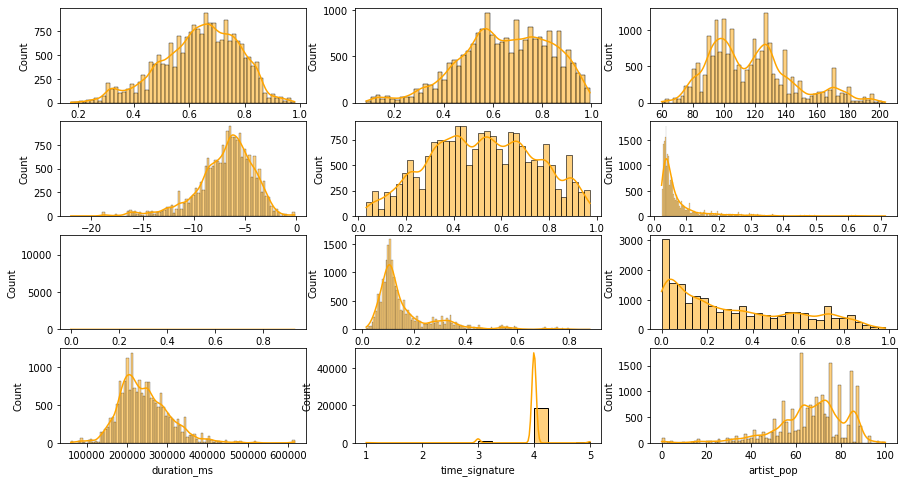

In [ ]:
# Plotting numerical variables
#numerical_cols = df_playlist.select_dtypes('number').drop('time_signature', 1).columns.to_list()
numerical_cols = df_playlist.select_dtypes('number').columns.to_list()

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,8))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data= df_playlist, x=col, kde=True, fill=True, color='orange')

plt.tight_layout()
plt.show()

In [ ]:
# Colecting data only for the genres having greater than 10 tracks
merged_left = pd.merge(left=playlist_det, right=genres, how='left', left_on='genres', right_on='genres')

In [ ]:
# Removing the rows with null counts
merged_left = merged_left[~merged_left['counts'].isnull()]

Text(0.5, 0, 'danceability')

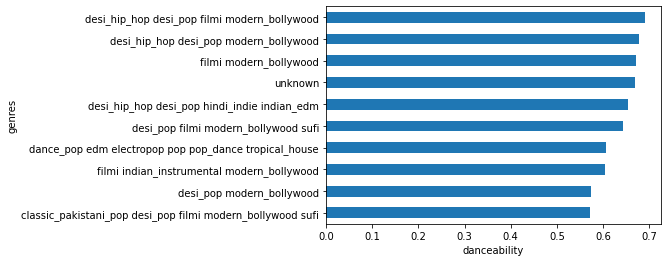

In [ ]:
# Plotting a horizontal bar plot for the different genres based on the dancebaility feature
x = merged_left.groupby('genres')['danceability'].mean().sort_values().tail(15)
x.plot(kind='barh')
plt.xlabel('danceability')

'desi_hip_hop desi_pop Filmi modern_bollywood' genre has the maximum danceability attribute.

Text(0.5, 0, 'energy')

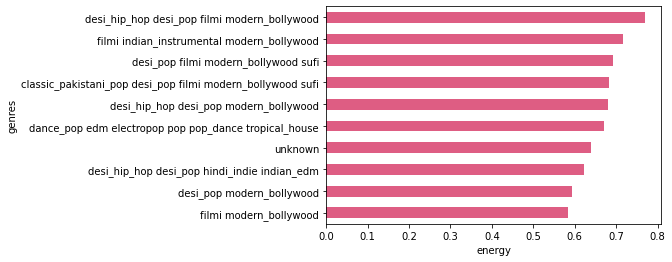

In [ ]:
# Plotting a horizontal bar plot for the different genres based on the dancebaility feature
x = merged_left.groupby('genres')['energy'].mean().sort_values().tail(15)
x.plot(kind='barh', color= '#de5d83')
plt.xlabel('energy')

'desi_hip_hop desi_pop filmi modern_bollywood' has the maximum energy

In [ ]:
df_playlist.shape

(19827, 18)

In [ ]:
# Correlation
data_corr = df_playlist.corr()
data_corr

,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,duration_ms,time_signature,artist_pop,track_pop
danceability,1.000000,0.195362,-0.125013,0.084400,0.465144,0.180089,-0.014608,-0.022697,-0.274067,-0.268833,0.062870,-0.091846,-0.009434
energy,0.195362,1.000000,0.079540,0.723193,0.368011,0.171433,-0.040240,0.166432,-0.576688,-0.016231,0.141386,0.104287,0.001330
tempo,-0.125013,0.079540,1.000000,0.026516,-0.025391,0.039224,0.057753,0.053452,-0.138062,0.002229,-0.015139,0.032959,0.007770
loudness,0.084400,0.723193,0.026516,1.000000,0.240867,0.071329,-0.174776,0.133344,-0.372551,-0.069704,0.093137,0.212365,0.133341
valence,0.465144,0.368011,-0.025391,0.240867,1.000000,0.164026,-0.164418,0.072318,-0.192793,-0.082639,0.091955,-0.015947,-0.017913
speechiness,0.180089,0.171433,0.039224,0.071329,0.164026,1.000000,-0.057807,0.077534,-0.177321,-0.186163,0.040496,-0.074379,-0.058676
instrumentalness,-0.014608,-0.040240,0.057753,-0.174776,-0.164418,-0.057807,1.000000,0.008115,-0.036699,-0.118717,-0.002423,-0.138399,-0.099105
liveness,-0.022697,0.166432,0.053452,0.133344,0.072318,0.077534,0.008115,1.000000,-0.112382,-0.067294,0.036786,0.011737,-0.051994
acousticness,-0.274067,-0.576688,-0.138062,-0.372551,-0.192793,-0.177321,-0.036699,-0.112382,1.000000,0.088723,-0.135714,-0.035310,0.027318
duration_ms,-0.268833,-0.016231,0.002229,-0.069704,-0.082639,-0.186163,-0.118717,-0.067294,0.088723,1.000000,-0.140648,0.157219,-0.018299


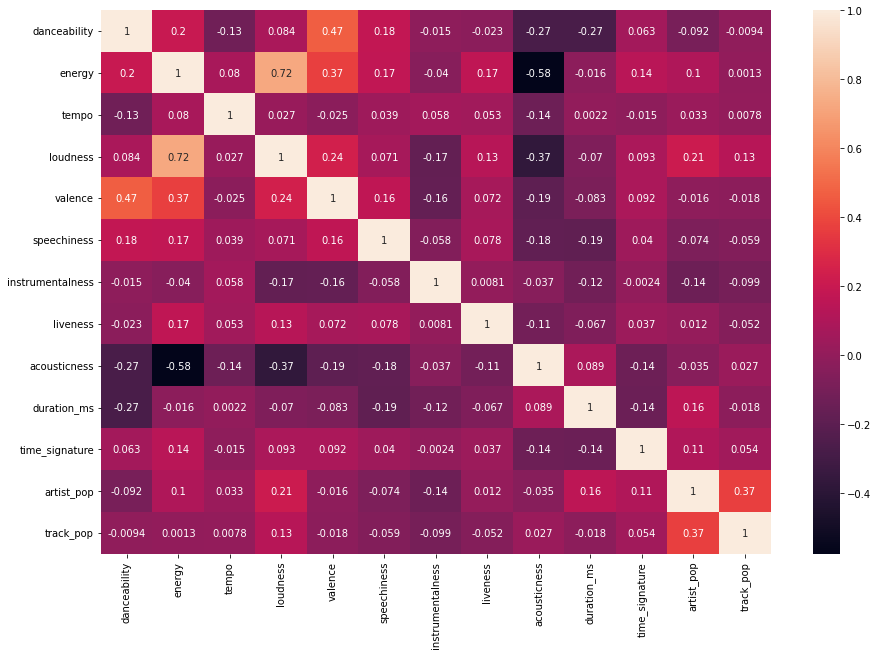

In [ ]:
# Heatmap for correlation
plt.figure (figsize=(15, 10))
sns.heatmap(data_corr,annot=True);

In [ ]:
df_playlist.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'loudness',
       'valence', 'speechiness', 'instrumentalness', 'liveness',
       'acousticness', 'duration_ms', 'time_signature', 'artist_name',
       'artist_id', 'artist_pop', 'track_pop', 'genres'],
      dtype='object')

In [ ]:
# Drop song duplicates
def drop_duplicates(df):
    df['artists_song'] = df.apply(lambda row: row['artist_name']+ row['track_name'],axis = 1)
    return df.drop_duplicates('artists_song')

df_data = drop_duplicates(df_playlist)

In [ ]:
df_playlist.shape

(19827, 19)

In [ ]:
df_data.shape

(1639, 19)

In [ ]:
# Preprocess the genre data
def genre_preprocess(df):
    df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))
    return df

df_data = genre_preprocess(df_data)
df_data['genres_list'].head()

0                                [bedroom_soul, pop]
1     [filmi, indian_instrumental, modern_bollywood]
2    [alt_z, dark_pop, pop, pop_punk, post-teen_pop]
3          [dance_pop, edm, pop, pop_dance, pop_rap]
4                     [dance_pop, edm, pop, pop_rap]
Name: genres_list, dtype: object

In [ ]:
df_data.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'loudness',
       'valence', 'speechiness', 'instrumentalness', 'liveness',
       'acousticness', 'duration_ms', 'time_signature', 'artist_name',
       'artist_id', 'artist_pop', 'track_pop', 'genres', 'artists_song',
       'genres_list'],
      dtype='object')

In [ ]:
# Removing unwanted columns
df_data = df_data.drop(['track_id', 'genres', 'artist_id'], 1)

In [ ]:
df_data.head()

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,duration_ms,time_signature,artist_name,artist_pop,track_pop,artists_song,genres_list
0,Come With Me,0.876,0.565,111.936,-6.569,0.931,0.0333,0.028400,0.1140,0.160,209732,4,Surfaces,68,70,SurfacesCome With Me,"[bedroom_soul, pop]"
1,Kalank (Title Track),0.570,0.550,117.999,-8.343,0.435,0.0350,0.000037,0.0921,0.524,311186,4,Pritam,85,73,PritamKalank (Title Track),"[filmi, indian_instrumental, modern_bollywood]"
2,Pretty Girl,0.456,0.764,124.971,-3.584,0.383,0.1480,0.000000,0.2290,0.298,219429,5,Maggie Lindemann,64,66,Maggie LindemannPretty Girl,"[alt_z, dark_pop, pop, pop_punk, post-teen_pop]"
3,Waiting For Love,0.579,0.736,127.999,-3.863,0.613,0.0527,0.000000,0.1980,0.310,230613,4,Avicii,80,81,AviciiWaiting For Love,"[dance_pop, edm, pop, pop_dance, pop_rap]"
4,I Took A Pill In Ibiza - Seeb Remix,0.665,0.727,101.976,-6.570,0.660,0.1030,0.000010,0.0873,0.032,197933,4,Mike Posner,69,58,Mike PosnerI Took A Pill In Ibiza - Seeb Remix,"[dance_pop, edm, pop, pop_rap]"


In [ ]:
df_data.shape

(1639, 17)

In [ ]:
# Removing rows with na
df_data.dropna(how='all', axis=1,inplace=True)

In [ ]:
df_data.shape

(1639, 17)

In [ ]:
# We will also remove trackname and artist_song
#df_playlist = df_playlist.drop(['track_name', 'artists_song','artist_name'], 1)
df_data = df_data.drop(['track_name', 'artist_name'], 1)

In [ ]:
df_data.columns

Index(['danceability', 'energy', 'tempo', 'loudness', 'valence', 'speechiness',
       'instrumentalness', 'liveness', 'acousticness', 'duration_ms',
       'time_signature', 'artist_pop', 'track_pop', 'artists_song',
       'genres_list'],
      dtype='object')

## Kmeans Clustetring

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_playlist)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = list(df_playlist.columns)
data_scaled.head()'''

In [ ]:
# create the session
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
#Panda Dataframe to Spark Dataframe 
data_spark = spark.createDataFrame(df_data)

In [ ]:
#Create a vector assembler and transform raw features into a single set of features.
from pyspark.ml.feature import VectorAssembler
assemble=VectorAssembler(inputCols=['danceability','energy','tempo','loudness','valence','speechiness','instrumentalness','liveness', 'acousticness','duration_ms','time_signature', 'artist_pop','track_pop'],
                         outputCol = 'features') 

data_spark=assemble.transform(data_spark)  

In [ ]:
data_spark.columns

['danceability',
 'energy',
 'tempo',
 'loudness',
 'valence',
 'speechiness',
 'instrumentalness',
 'liveness',
 'acousticness',
 'duration_ms',
 'time_signature',
 'artist_pop',
 'track_pop',
 'artists_song',
 'genres_list',
 'features']

In [ ]:
#Train a k-means model with k=3
km=KMeans(featuresCol='features', k=3) 
km_fit=km.fit(data_spark)
#Make predictions
km_pred=km_fit.transform(data_spark)
km_pred.show()

+------------+------+-------+--------+-------+-----------+----------------+--------+------------+-----------+--------------+----------+---------+--------------------+--------------------+--------------------+----------+
|danceability|energy|  tempo|loudness|valence|speechiness|instrumentalness|liveness|acousticness|duration_ms|time_signature|artist_pop|track_pop|        artists_song|         genres_list|            features|prediction|
+------------+------+-------+--------+-------+-----------+----------------+--------+------------+-----------+--------------+----------+---------+--------------------+--------------------+--------------------+----------+
|       0.876| 0.565|111.936|  -6.569|  0.931|     0.0333|          0.0284|   0.114|        0.16|     209732|             4|        68|       70|SurfacesCome With Me| [bedroom_soul, pop]|[0.876,0.565,111....|         1|
|        0.57|  0.55|117.999|  -8.343|  0.435|      0.035|         3.73E-5|  0.0921|       0.524|     311186|           

In [ ]:
#Computation of Silhouette score.
from pyspark.ml.evaluation import ClusteringEvaluator
org_evaluator = ClusteringEvaluator(featuresCol='features',metricName='silhouette', distanceMeasure='squaredEuclidean')

silhouette = org_evaluator.evaluate(km_pred)
print("Silhouette Score = " + str(silhouette))

Silhouette Score = 0.6727383570989065


In [ ]:
kmax = 0 
evaluator = ClusteringEvaluator(featuresCol='features', metricName='silhouette')
score_max = 0


krange = list(range(2,15))

for k in krange:
    # Train a k-means model
    kmeans_model = KMeans(featuresCol='features', k=k)
    model = kmeans_model.fit(data_spark)

    KMeans_predictions = model.transform(data_spark) 

    # Evaluate clustering by computing Silhouette score
    score = evaluator.evaluate(KMeans_predictions)
    print("k = "+ str(k) + ",Silhouette Score = " + str(score))

    #values.append(score)

    if score > score_max:
      score_max = score
      k_max=k

k = 2,Silhouette Score = 0.7295702535941383
k = 3,Silhouette Score = 0.6727383570989065
k = 4,Silhouette Score = 0.6546705399712031
k = 5,Silhouette Score = 0.664808275529076
k = 6,Silhouette Score = 0.6697935467551281
k = 7,Silhouette Score = 0.6663180451810082
k = 8,Silhouette Score = 0.6832297698313246
k = 9,Silhouette Score = 0.6984713968840621
k = 10,Silhouette Score = 0.6798453848699406
k = 11,Silhouette Score = 0.6702246483472978
k = 12,Silhouette Score = 0.6890628810368505
k = 13,Silhouette Score = 0.6955861335360422
k = 14,Silhouette Score = 0.6732489973864086


In [ ]:
print(" Kmax : "+str(k_max)+ " with Silhoutte Score : "+str(score_max))

 Kmax : 2 with Silhoutte Score : 0.7295702535941383


In [ ]:
# retraining with k=2
from pyspark.ml.clustering import KMeans

#Train a k-means model with k=2
km=KMeans(featuresCol='features', k=2) 
km_fit=km.fit(data_spark)
#Make predictions
cluster_centers = km_fit.clusterCenters()
km_pred = km_fit.transform(data_spark)
km_pred.show()

+------------+------+-------+--------+-------+-----------+----------------+--------+------------+-----------+--------------+----------+---------+--------------------+--------------------+--------------------+----------+
|danceability|energy|  tempo|loudness|valence|speechiness|instrumentalness|liveness|acousticness|duration_ms|time_signature|artist_pop|track_pop|        artists_song|         genres_list|            features|prediction|
+------------+------+-------+--------+-------+-----------+----------------+--------+------------+-----------+--------------+----------+---------+--------------------+--------------------+--------------------+----------+
|       0.876| 0.565|111.936|  -6.569|  0.931|     0.0333|          0.0284|   0.114|        0.16|     209732|             4|        68|       70|SurfacesCome With Me| [bedroom_soul, pop]|[0.876,0.565,111....|         0|
|        0.57|  0.55|117.999|  -8.343|  0.435|      0.035|         3.73E-5|  0.0921|       0.524|     311186|           

In [ ]:
cluster_data = km_pred.toPandas()

In [ ]:
cluster_data['prediction'].unique()

array([0, 1], dtype=int32)

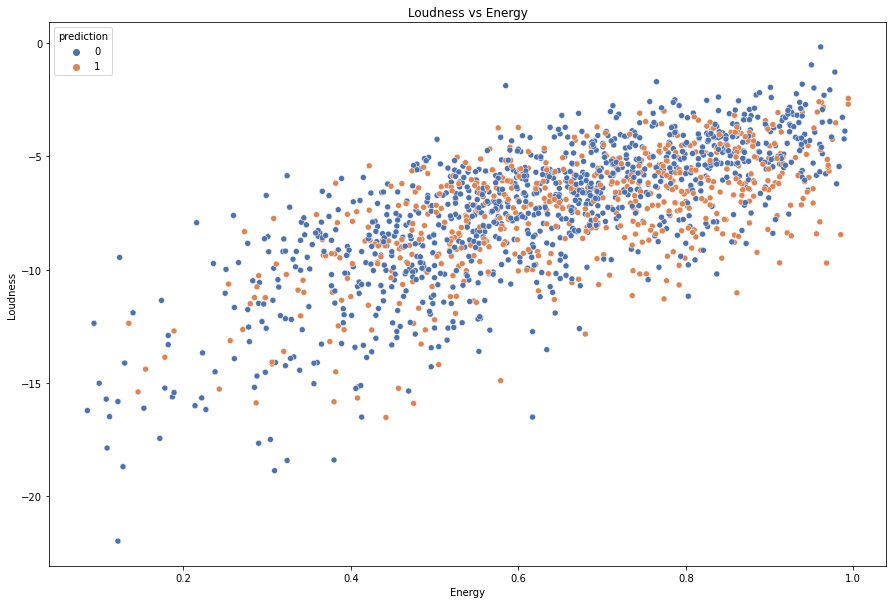

In [ ]:
# Plotting the features like energy and loudness with clusters data
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'energy',y = 'loudness', data = cluster_data, hue = 'prediction',palette='deep')
plt.title('Loudness vs Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

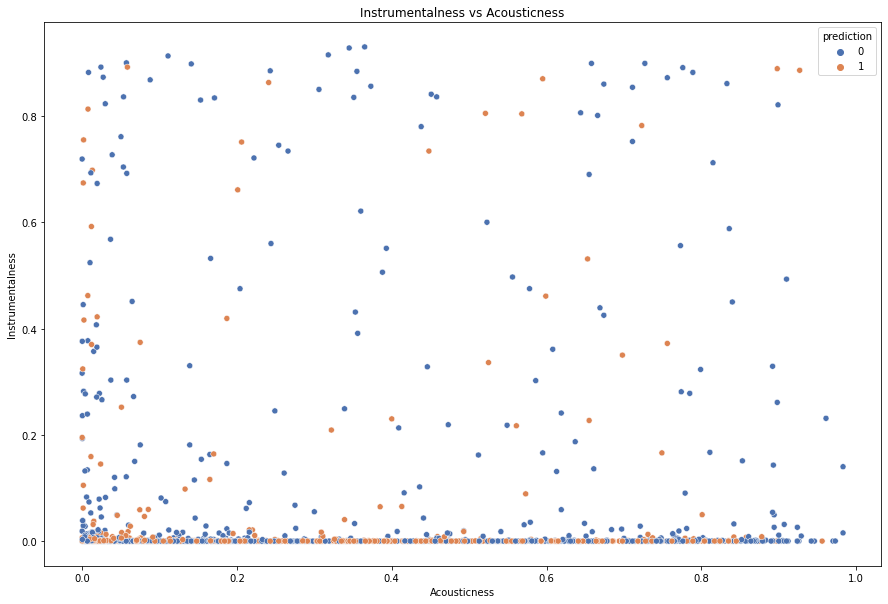

In [ ]:
# Plotting Instrumentalness vs Acousticness
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'acousticness',y = 'instrumentalness', data = cluster_data, hue = 'prediction',palette='deep')
plt.title('Instrumentalness vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.show()

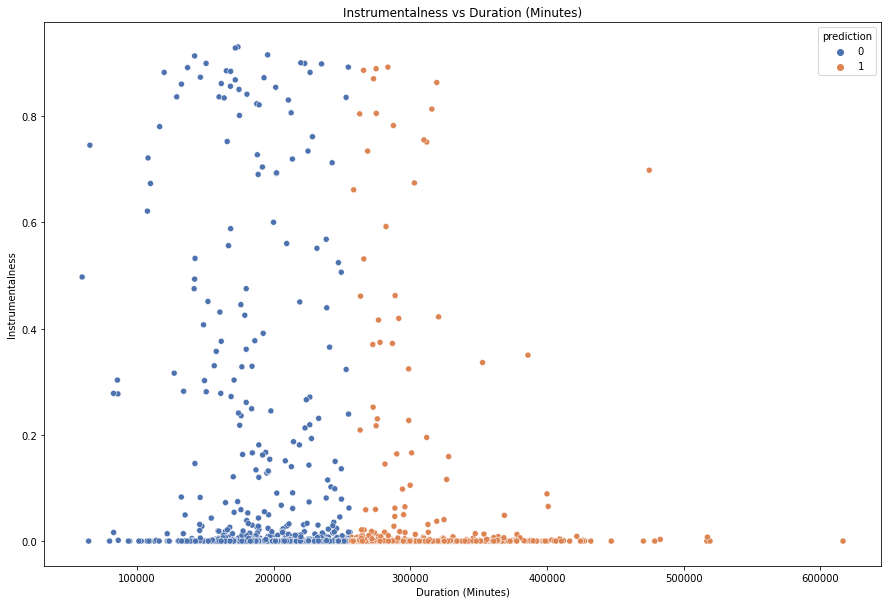

In [ ]:
# Plotting Instrumentalness vs Duration 
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'duration_ms',y = 'instrumentalness', data = cluster_data, hue = 'prediction',palette='deep')
plt.title('Instrumentalness vs Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Instrumentalness')
plt.show()

### **Recommender System**

In [ ]:
cluster_data.shape

(1639, 17)

In [ ]:
# Function to fetch the test song features
def get_song_details(artist, track):
  track_det = sp.search(q='artist:' + artist + ' track:' + track, type='track')
  trackId = track_det['tracks']['items'][0]['id']
  audio_features = sp.audio_features(trackId)

  features_list = []
  for features in audio_features:
    features_list.append([features['danceability'],
                          features['energy'], features['tempo'],
                          features['loudness'], features['valence'],
                          features['speechiness'], features['instrumentalness'],
                          features['liveness'], features['acousticness'],features['type'],features['uri'],
                          features['track_href'], features['analysis_url'],features['duration_ms'],features['time_signature']])

  df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                      'tempo', 'loudness', 'valence',
                                                      'speechiness', 'instrumentalness',
                                                      'liveness', 'acousticness','type','uri','track_href',
                                                      'analysis_url','duration_ms','time_signature'])
  df_audio_features['track_id']  = trackId 
  df_audio_features['track_pop'] = df_audio_features['track_id'].swifter.apply(lambda x: get_track_pop(x))
  df_audio_features['artist_id'] = df_audio_features['track_id'].swifter.apply(lambda x: get_artist_id(x))
  df_audio_features['artist_pop'] = df_audio_features['artist_id'].swifter.apply(lambda x: get_artist_pop(x))

  return df_audio_features    

In [ ]:
# Function to predict the cluster the test song belongs to based on the song features
def predict(data, centroids):
    np_test = data.to_numpy()
    np_cluster = np.array(centroids)
    diff = np_cluster - np_test[0,:]
    dist = np.sqrt(np.sum(diff**2, axis=-1))  # Euclidean distance
    closest_centroid = np_cluster[np.argmin(dist),]
    for i in range(0,len(np_cluster)):
      if (closest_centroid == np_cluster[i]).all():
        prediction = i

    return closest_centroid, prediction

In [ ]:
# Function to get the song suggestion
def song_predictions(artist, track, centroids, cluster_data, num):
  data = get_song_details(artist, track)
  data = data.drop(['type', 'uri','track_href', 'analysis_url','track_id','artist_id'], axis =1)
  closest_centroid, prediction = predict(data, centroids)
  df = cluster_data[cluster_data['prediction'] == prediction]
  np_test = data.to_numpy()
  count = 0
  diff =[]
  for ind in df.index:
    v = df['features'][ind].toArray()
    diff.append([distance.euclidean(np_test, v),count])
    count += 1
  diff.sort()
  print('The best suggestions are :')
  i = 0
  while i <= num:
      song_name = artist+track
      if df.iloc[diff[i][1]]['artists_song'] != song_name:
        print(df.iloc[diff[i][1]]['artists_song'])
      i += 1

In [ ]:
# Get user inputs
artist = input('Enter the artist name :')
track = input('Enter the song name: ')
num = int(input('Enter the number of songs you want : '))
song_predictions(artist, track, cluster_centers, cluster_data, num)

Enter the artist name :Ed Sheeran
Enter the song name: Perfect
Enter the number of songs you want : 3


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

The best suggestions are :
KKKhulla Asmaan
Arijit SinghTose Naina (From "Mickey Virus")
Shankar-Ehsaan-LoyHeartbeat - Instrumental
